In [1]:
import numpy as np
import pandas as pd
import torch
import cv2
import matplotlib.pyplot as plt
import os
from tqdm import tqdm
import pickle
from show_img import *

In [11]:
mode = 'center'
# mode = 'random'

dataset = 'solar_pv'
# dataset = 'inria_DG'

results = pd.read_csv('{}_{}_IOU.csv'.format(dataset, mode), index_col=0)

In [12]:
results

,img_name,prompt_ind,SAM_conf_0,SAM_conf_1,SAM_conf_2,IoU_0,IoU_1,IoU_2,cur_object_size
0,11ska625740_13_27.tif,0,0.618864,0.988071,0.831618,0.333333,0.057815,0.033012,209
1,11ska565665_04_15.tif,0,0.949611,0.891012,0.728942,0.043531,0.568319,0.375651,827
2,11ska535845_25_23.tif,0,0.912152,0.897931,0.706974,0.036609,0.022837,0.006201,19
3,11ska535845_25_23.tif,1,0.750357,0.993421,0.873095,0.476190,0.892857,0.109091,84
4,11ska520830_25_08.tif,0,0.913845,0.834014,0.799500,0.254826,0.564885,0.105892,257
...,...,...,...,...,...,...,...,...,...
35300,11ska475755_11_12.tif,1,0.973577,0.903352,0.763354,0.715909,0.239865,0.051298,84
35301,11ska625755_23_13.tif,0,0.968636,0.917808,0.706696,0.782486,0.216381,0.067390,354
35302,11ska460800_19_08.tif,0,0.824670,0.928298,0.804066,0.631737,0.803949,0.183617,668
35303,11ska475800_31_31.tif,0,0.931111,0.947422,0.665785,0.767241,0.108941,0.031889,435


Text(0.5, 1.0, 'object size (px)')

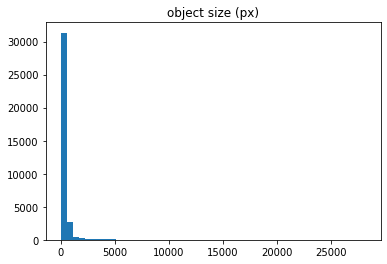

In [13]:
f = plt.figure()
plt.hist(results['cur_object_size'], bins=50)
plt.title('object size (px)')

## Get the maximum confidence mask IoU

In [14]:
confidence_mat = results[['SAM_conf_0','SAM_conf_1','SAM_conf_2']].values
IoU_mat = results[['IoU_0','IoU_1','IoU_2']].values
arg_max_list = np.argmax(confidence_mat, axis=1)
print(np.shape(arg_max_list))

(35305,)


In [15]:
max_conf_IoU_list = np.zeros(len(IoU_mat))
for i in range(len(max_conf_IoU_list)):
    max_conf_IoU_list[i] = IoU_mat[i, arg_max_list[i]]
max_IoU_list = np.max(IoU_mat, axis=1)

In [16]:
print('max confidence average IoU is: ', np.mean(max_conf_IoU_list))
print('average max IoU is: ', np.mean(max_IoU_list))

max confidence average IoU is:  0.636166968385304
average max IoU is:  0.7261667303352886


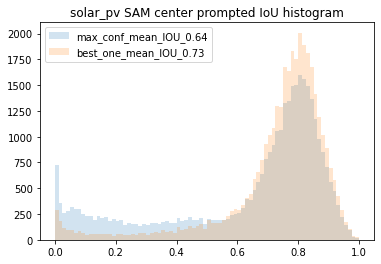

In [17]:
f = plt.figure()
plt.hist(max_conf_IoU_list, label='max_conf_mean_IOU_{:.2f}'.format(np.mean(max_conf_IoU_list)), 
        bins=80, alpha=0.2)
plt.hist(max_IoU_list, label='best_one_mean_IOU_{:.2f}'.format(np.mean(max_IoU_list)), 
        bins=80, alpha=0.2)
plt.title('{} SAM {} prompted IoU histogram'.format(dataset, mode))
plt.legend()